In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'sport_odds_data.csv'


# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Now you can work with the DataFrame 'df' as needed
# print(df.head())  

print(len(df))

1535


In [2]:
# Extract the list of all columns
column_list = df.columns.tolist()

ID = column_list[0]
SPORT_KEY = column_list[1]
SPORT_TITLE = column_list[2]
COMMENCE_TIME = column_list[3]
HOME_TEAM = column_list[4]
AWAY_TEAM = column_list[5]
BOOKMAKER_KEY = column_list[6]
BOOKMAKER_TITLE = column_list[7]
HOME_WIN = column_list[8]
AWAY_WIN = column_list[9]
DRAW = column_list[10]
OVER_2_5 = column_list[11]
UNDER_2_5 = column_list[12]
HOME_GOALS = column_list[13]
AWAY_GOALS = column_list[14]

print(column_list)

['id', 'sport_key', 'sport_title', 'commence_time', 'home_team', 'away_team', 'bookmaker_key', 'bookmaker_title', 'home_win', 'away_win', 'draw', 'over_2_5', 'under_2_5', 'home_goals', 'away_goals']


In [4]:
## Filtering only past events

from datetime import datetime

#Saving original commence_time format
df_commence_time = df['commence_time']

# print(df_commence_time)

# Convert the "commence_time" column to datetime
df['commence_time'] = pd.to_datetime(df['commence_time'])

# Get the current date without the time component
current_date = datetime.now().date()

# Extract the date component from the "commence_time" column
df['commence_date'] = df['commence_time'].dt.date

# Filter rows where "commence_date" is before the current date
df = df[df['commence_date'] < current_date]

# Drop the temporary "commence_date" column if you don't need it
df = df.drop(columns=['commence_date'])

#Restoring original commence_time format
df['commence_time'] = df_commence_time

print(len(df))


1443


In [5]:
# Assuming df is your DataFrame
# Convert 'commence_time' column to datetime type
df['commence_time'] = pd.to_datetime(df['commence_time'])

# Find the start date of the first subset
start_date = df['commence_time'].iloc[0]

# Calculate the number of days in three weeks
three_weeks = pd.Timedelta(days=21)

# Calculate the end date of the first subset
end_date = start_date + three_weeks

# Create a list to store the sub-dataframes
sub_dfs = []

# Iterate over the data in three-week intervals
while start_date <= df['commence_time'].max():
    # Subset the dataframe based on the current interval
    sub_df = df[(df['commence_time'] >= start_date) & (df['commence_time'] < end_date)]
    
    # Append the subset to the list
    sub_dfs.append(sub_df)
    
    # Move to the next interval
    start_date = end_date
    end_date = start_date + three_weeks

# Now sub_dfs contains the sub-dataframes of length three weeks


In [7]:
print(len(sub_dfs))

12


In [11]:
import numpy as np
from odds_accuracy_utils import get_match_outcome

averages_ties_per_match_in_three_weeks = []
for sub_df in sub_dfs:
    match_counter = 0
    ties_counter = 0
    for _, row in sub_df.iterrows():
        match_counter += 1
        match_outcome = get_match_outcome(row)
        if (match_outcome == "X"):
            ties_counter += 1

    averages_ties_per_match_in_three_weeks.append(ties_counter/match_counter)     

print(np.average(averages_ties_per_match_in_three_weeks), np.std(averages_ties_per_match_in_three_weeks))     
print(np.std(averages_ties_per_match_in_three_weeks)/np.average(averages_ties_per_match_in_three_weeks))      

0.27268574917764443 0.0433277534733201
0.15889262128287354


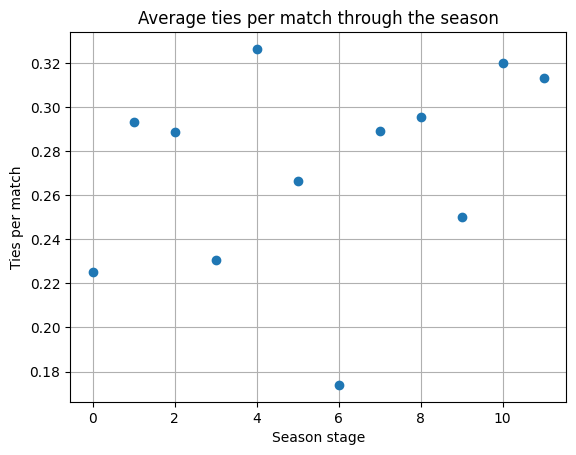

In [9]:
from matplotlib import pyplot as plt

season_stage = range(0, len(averages_ties_per_match_in_three_weeks))

# Plotting the result
plt.errorbar(season_stage, averages_ties_per_match_in_three_weeks, fmt='o')
plt.xlabel('Season stage')
plt.ylabel('Ties per match')
plt.title(f'Average ties per match through the season')
plt.grid(True)
plt.show()    
